In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image Shape: (1018, 1402, 3)
Pixel X 650, Y 500: [249 246 221]
Pixel X 1300, Y 100: [203   1  14]
Pixel X 650, Y 200: [0 0 0]


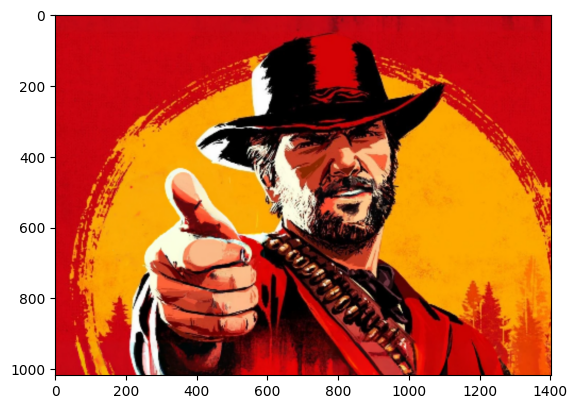

In [2]:
img = cv2.imread(r'/content/rdc_pic.PNG', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


print("Image Shape:", img.shape)

print("Pixel X 650, Y 500:", img[500, 650]) # light on arthurs face
print("Pixel X 1300, Y 100:", img[100, 1300]) # red background in top right
print("Pixel X 650, Y 200:", img[200, 650]) # black part of arthurs hat

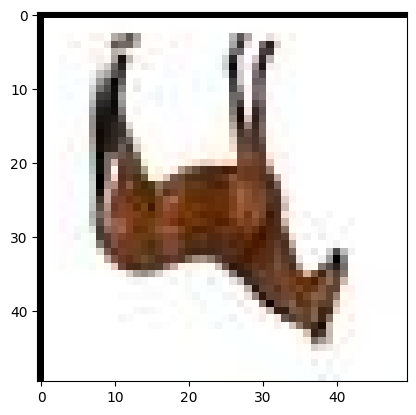

In [6]:
def rotate_image(image_path, output_path, angle):
    img = cv2.imread(image_path)
    rows, cols = img.shape[:2]

    # Compute the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)

    # Apply the rotation
    rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))

    # Save the rotated image
    cv2.imwrite(output_path, rotated_img)

    # make it rgb so it can plotted in matplotlib
    rotated_rgb = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rotated_rgb)

# Example usage: Rotate the image by 45 degrees
rotate_image(r"/content/horse_1.jpg", r'/content/rotated_img.jpg', 180)

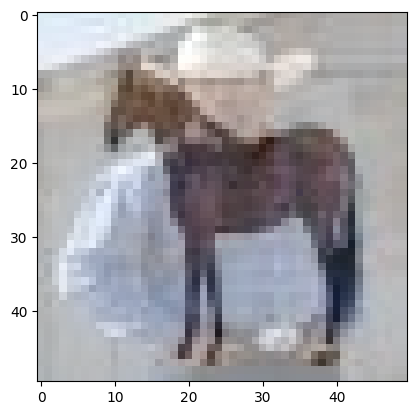

In [7]:
def normalize_img(img): # prevents overflow and weird integer conversion when adding
    return img / 255.0

def load_img(path): # load and convert to rgb
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def blend_imgs(path_1, path_2, alpha): # blend the images
  img_1 = load_img(path_1)
  img_2 = load_img(path_2)

  img_1 = normalize_img(img_1)
  img_2 = normalize_img(img_2)

  # c = a(alpha) + b(1-alpha)
  blended_img = (img_1 * alpha) + (img_2 * (1-alpha))

  plt.imshow(blended_img)
  return

blend_imgs(r"/content/horse_1.jpg", r"/content/cowboy_4.jpg", 0.5)